In [1]:
import os
import glob
from matplotlib import pyplot as plt
import re
import numpy as np

In [2]:
path = r'C:\Users\parkf\Desktop\summer2021\htcRuns'

subjectList = []
ridgeVec = []
memVec = []
foldVec = []

for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    if int(fileNum) not in subjectList:
        subjectList.append(int(fileNum))
    if int(memNum) not in memVec:
        memVec.append(int(memNum))
    if float(ridgeNum) not in ridgeVec:
        ridgeVec.append(float(ridgeNum))
    if int(foldNum) not in foldVec:
        foldVec.append(int(foldNum))

err = np.zeros((len(subjectList), len(memVec), len(ridgeVec), len(foldVec)))
for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    f = open(filename,"r")
    error = (float(f.read()))
    err[subjectList.index(int(fileNum)), memVec.index(int(memNum)), ridgeVec.index(float(ridgeNum)), int(foldNum)] = error
      
            
errNoCv = np.mean(err,3)
    

In [3]:
print(errNoCv.shape)
print(err.shape)
print(err)
print(errNoCv)

(10, 5, 4)
(10, 5, 4, 10)
[[[[0.17307552 0.17307552 0.17307552 ... 0.17307552 0.17307552
    0.17307552]
   [0.17408957 0.17408957 0.17408957 ... 0.17408957 0.17408957
    0.17408957]
   [0.17551285 0.17551285 0.17551285 ... 0.17551285 0.17551285
    0.17551285]
   [0.18086508 0.18086508 0.18086508 ... 0.18086508 0.18086508
    0.18086508]]

  [[0.1728926  0.1728926  0.1728926  ... 0.1728926  0.1728926
    0.1728926 ]
   [0.17391853 0.17391853 0.17391853 ... 0.17391853 0.17391853
    0.17391853]
   [0.17535473 0.17535473 0.17535473 ... 0.17535473 0.17535473
    0.17535473]
   [0.18074186 0.18074186 0.18074186 ... 0.18074186 0.18074186
    0.18074186]]

  [[0.17280061 0.17280061 0.17280061 ... 0.17280061 0.17280061
    0.17280061]
   [0.17383018 0.17383018 0.17383018 ... 0.17383018 0.17383018
    0.17383018]
   [0.17527337 0.17527337 0.17527337 ... 0.17527337 0.17527337
    0.17527337]
   [0.18068383 0.18068383 0.18068383 ... 0.18068383 0.18068383
    0.18068383]]

  [[0.17521342 0.1752

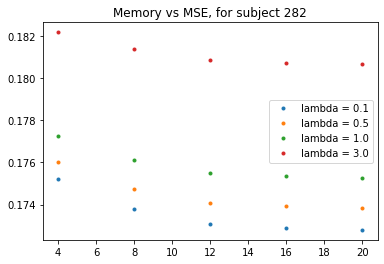

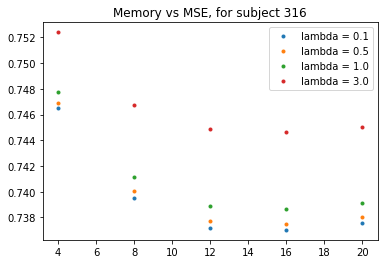

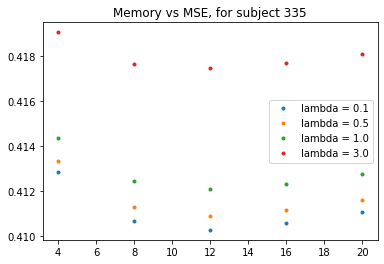

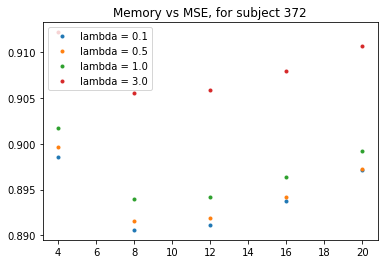

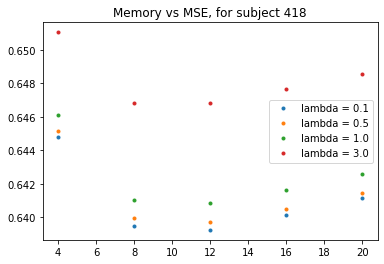

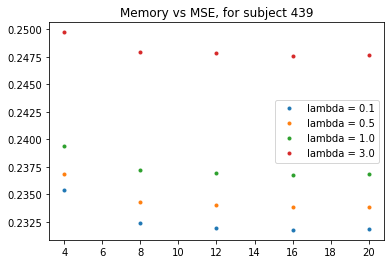

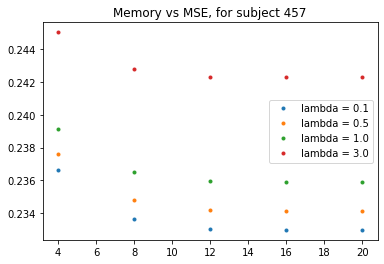

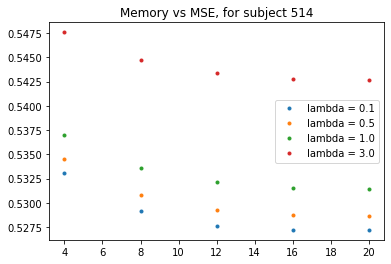

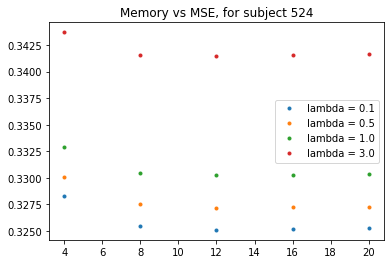

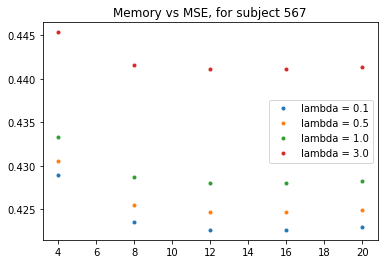

In [4]:
for n in range(len(subjectList)):
    titleString = f"Memory vs MSE, for subject {subjectList[n]}"
    plt.title(titleString)
    for i in range(len(ridgeVec)):
        plt.plot(memVec[:], errNoCv[n , :, i], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    plt.legend()
    plt.show()